In [2]:
%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install keras-tuner
%pip install tensorboard
%pip install nlpaug
%pip install matplotlib
%pip install imbalanced-learn
%pip install fastai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, Input, Layer, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.initializers import RandomNormal, RandomUniform, GlorotUniform, HeNormal
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from fastai.vision.all import *

import numpy as np
import matplotlib.pyplot as plt
import os

## a) l1 l2

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8853 - accuracy: 0.9027 - val_loss: 0.5178 - val_accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4806 - accuracy: 0.9404 - val_loss: 0.4585 - val_accuracy: 0.9351
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4086 - accuracy: 0.9485 - val_loss: 0.3729 - val_accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3774 - accuracy: 0.9519 - val_loss: 0.3557 - val_accuracy: 0.9562
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3598 - accuracy: 0.9530 - val_loss: 0.3271 - val_accuracy: 0.9592
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.9548 - val_loss: 0.3480 - val_accuracy: 0.9531
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3366 - accuracy: 0.9557 - val_loss: 0.3187 - val_accuracy:

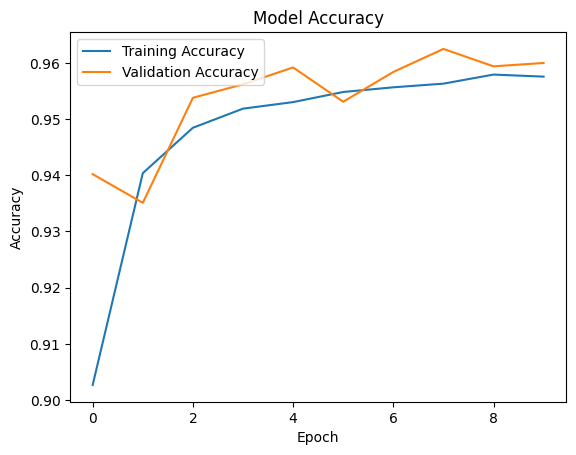

In [6]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

def create_model(l1_rate=0.01, l2_rate=0.01):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu', kernel_regularizer=l1(l1_rate)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model instance
model = create_model(l1_rate=0.001, l2_rate=0.001)

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## b) dropout

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5157 - accuracy: 0.8418 - val_loss: 0.1748 - val_accuracy: 0.9474
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.9184 - val_loss: 0.1403 - val_accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2422 - accuracy: 0.9299 - val_loss: 0.1224 - val_accuracy: 0.9620
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2125 - accuracy: 0.9391 - val_loss: 0.1129 - val_accuracy: 0.9667
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1980 - accuracy: 0.9413 - val_loss: 0.1124 - val_accuracy: 0.9656
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1853 - accuracy: 0.9460 - val_loss: 0.1063 - val_accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1739 - accuracy: 0.9484 - val_loss: 0.0995 - val_accuracy:

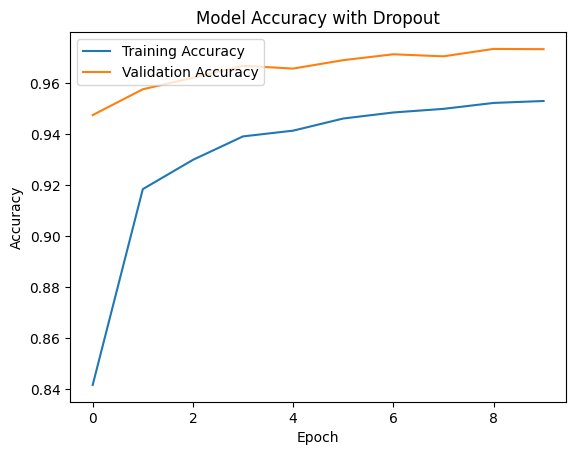

In [9]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

def create_model(dropout_rate=0.5):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model instance with specified dropout rate
model = create_model(dropout_rate=0.5)

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## c) earlystop

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2302 - accuracy: 0.9315 - val_loss: 0.1155 - val_accuracy: 0.9649
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0969 - accuracy: 0.9707 - val_loss: 0.0949 - val_accuracy: 0.9694
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0987 - val_accuracy: 0.9702
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0961 - val_accuracy: 0.9711
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0412 - accuracy: 0.9864 - val_loss: 0.0835 - val_accuracy: 0.9759
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.0836 - val_accuracy: 0.9770
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0877 - val_accuracy:

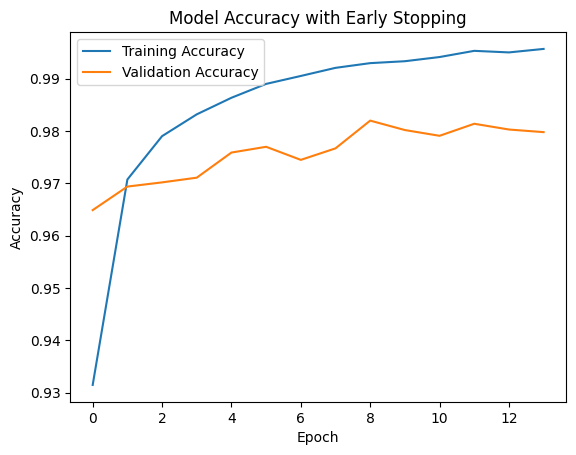

In [11]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model instance
model = create_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Early Stopping')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## d) montecarlo dropout

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5056 - accuracy: 0.8446 - val_loss: 0.1748 - val_accuracy: 0.9445
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9212 - val_loss: 0.1357 - val_accuracy: 0.9602
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2333 - accuracy: 0.9324 - val_loss: 0.1197 - val_accuracy: 0.9630
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2081 - accuracy: 0.9393 - val_loss: 0.1102 - val_accuracy: 0.9676
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1938 - accuracy: 0.9427 - val_loss: 0.1105 - val_accuracy: 0.9670
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1823 - accuracy: 0.9467 - val_loss: 0.1028 - val_accuracy: 0.9693
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1700 - accuracy: 0.9505 - val_loss: 0.0969 - val_accuracy:

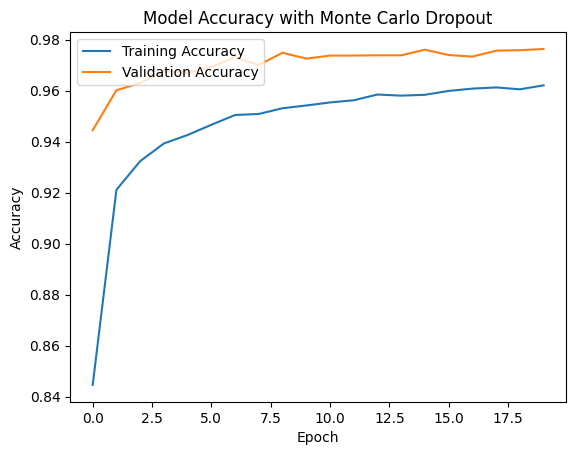

In [12]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

def create_model(dropout_rate=0.5):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    # Enable training mode in Dropout layers even during inference
    for layer in model.layers:
        if isinstance(layer, Dropout):
            layer._training = True
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model instance
model = create_model(dropout_rate=0.5)

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

def monte_carlo_predictions(model, x, n_predictions=100):
    predictions = [model.predict(x) for _ in range(n_predictions)]
    return np.mean(predictions, axis=0)

# Perform Monte Carlo predictions
mc_predictions = monte_carlo_predictions(model, x_test)

# Calculate accuracy from Monte Carlo predictions
mc_accuracy = np.mean(np.argmax(mc_predictions, axis=1) == y_test)
print(f'Monte Carlo Accuracy: {mc_accuracy}')

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Monte Carlo Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## e) various initializations and when to use what

C:\Users\Nickk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
C:\Users\Nickk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
C:\Users\Ni

Training model with Random Normal initialization
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2319 - accuracy: 0.9316 - val_loss: 0.1156 - val_accuracy: 0.9633
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0978 - accuracy: 0.9705 - val_loss: 0.0820 - val_accuracy: 0.9760
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.0832 - val_accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0522 - accuracy: 0.9831 - val_loss: 0.0867 - val_accuracy: 0.9739
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.9868 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0819 - val_accuracy: 0.9787
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0265 - ac

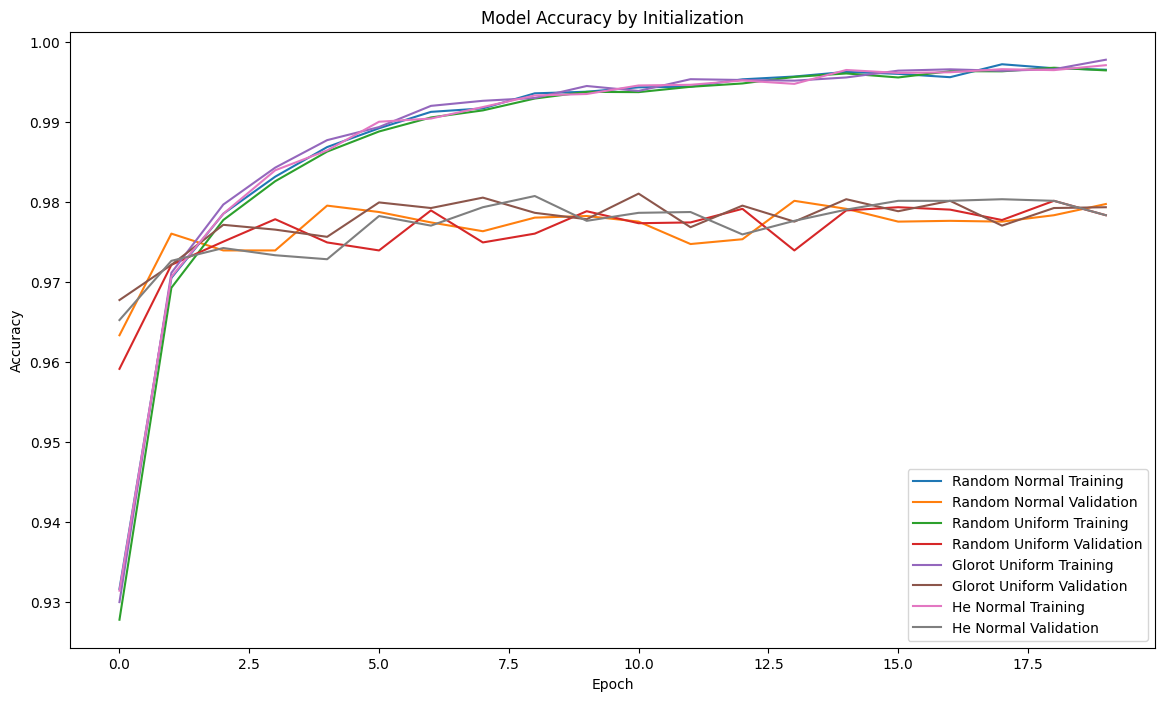

In [15]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

def create_model(initializer):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initializers
initializers = {
    'Random Normal': RandomNormal(mean=0.0, stddev=0.05),
    'Random Uniform': RandomUniform(minval=-0.05, maxval=0.05),
    'Glorot Uniform': GlorotUniform(),
    'He Normal': HeNormal()
}

models = {name: create_model(init) for name, init in initializers.items()}

histories = {}
epochs = 20

for name, model in models.items():
    print(f"Training model with {name} initialization")
    histories[name] = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

plt.figure(figsize=(14, 8))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Training')
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation')

plt.title('Model Accuracy by Initialization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## f) batch norm

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2239 - accuracy: 0.9336 - val_loss: 0.1086 - val_accuracy: 0.9668
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1087 - accuracy: 0.9663 - val_loss: 0.0927 - val_accuracy: 0.9705
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0816 - accuracy: 0.9743 - val_loss: 0.0820 - val_accuracy: 0.9757
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0646 - accuracy: 0.9789 - val_loss: 0.0798 - val_accuracy: 0.9755
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.0721 - val_accuracy: 0.9785
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9844 - val_loss: 0.0692 - val_accuracy: 0.9795
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9861 - val_loss: 0.0772 - val_accuracy:

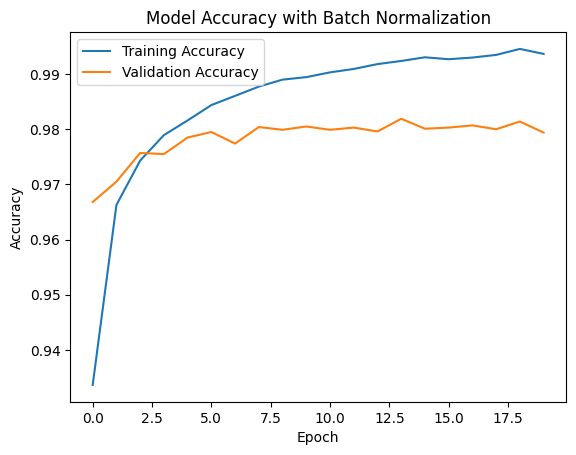

In [17]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model instance
model = create_model()

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Batch Normalization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## g) custom dropout, custom regularization

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1201 - accuracy: 0.8195 - val_loss: 0.6002 - val_accuracy: 0.9126
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7314 - accuracy: 0.8704 - val_loss: 0.5471 - val_accuracy: 0.9233
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6913 - accuracy: 0.8781 - val_loss: 0.5147 - val_accuracy: 0.9314
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6712 - accuracy: 0.8841 - val_loss: 0.4952 - val_accuracy: 0.9357
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6573 - accuracy: 0.8857 - val_loss: 0.4890 - val_accuracy: 0.9359
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6512 - accuracy: 0.8861 - val_loss: 0.4759 - val_accuracy: 0.9412
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6480 - accuracy: 0.8874 - val_loss: 0.4849 - val_accuracy:

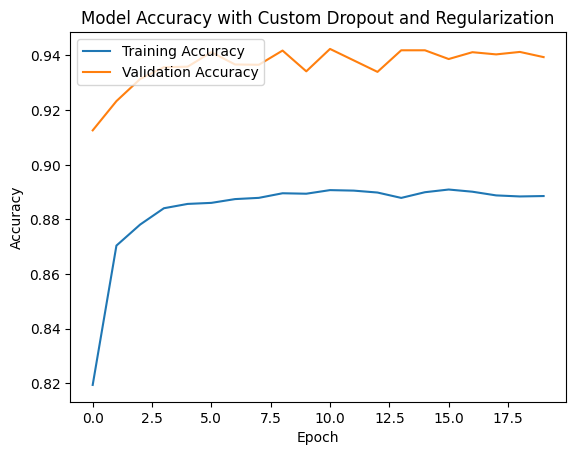

In [20]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

class CustomDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            noise_shape = tf.shape(inputs)
            dropout_mask = tf.nn.dropout(tf.ones(noise_shape), rate=self.rate)
            return inputs * dropout_mask
        return inputs

class CustomL2Regularizer(regularizers.Regularizer):
    def __init__(self, strength):
        self.strength = strength

    def __call__(self, x):
        return self.strength * tf.reduce_sum(tf.square(x))

    def get_config(self):
        return {'strength': self.strength}

def create_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=CustomL2Regularizer(0.01)),
        CustomDropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=CustomL2Regularizer(0.01)),
        CustomDropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model instance
model = create_model()

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Custom Dropout and Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## h) using callbacks and tensorboard

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2598 - accuracy: 0.9260 - val_loss: 0.1461 - val_accuracy: 0.9548
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.9657 - val_loss: 0.1050 - val_accuracy: 0.9668
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0857 - val_accuracy: 0.9725
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0766 - val_accuracy: 0.9753
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0799 - val_accuracy: 0.9762
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0704 - val_accuracy: 0.9785
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0883 - val_accuracy:

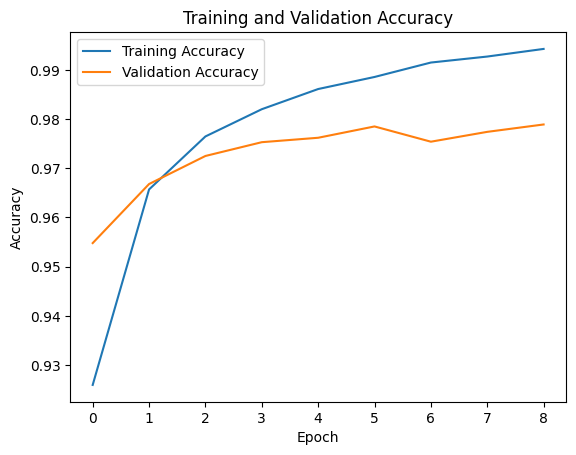

In [56]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

callbacks = [
    ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True),
    EarlyStopping(monitor='val_loss', patience=3),
    TensorBoard(log_dir='./logs')
]

history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

## i) using keras tuner

In [42]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

def build_model(hp):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def build_model(hp):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_tuner_mnist'
)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

# Print out the best model's architecture and hyperparameters
best_model.summary()
print('Best hyperparameters:', best_hyperparameters.values)

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Reloading Tuner from my_dir\keras_tuner_mnist\tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 320)               251200    
                                                                 
 dense_1 (Dense)             (None, 10)                3210      
                                                                 
Total params: 254410 (993.79 KB)
Trainable params: 254410 (993.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best hyperparameters: {'units': 320, 'learning_rate': 0.001}
313/313 [==============================] - 0s 827us/step - loss: 0.0705 - accuracy: 0.9818
Test accuracy: 0.9818000197410583


## j) use keras cv data augmentation 

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3218 - accuracy: 0.9015 - val_loss: 0.1061 - val_accuracy: 0.9663
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1279 - accuracy: 0.9610 - val_loss: 0.0577 - val_accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0956 - accuracy: 0.9707 - val_loss: 0.0628 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0819 - accuracy: 0.9745 - val_loss: 0.0363 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.0493 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0671 - accuracy: 0.9789 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0313 - val_ac

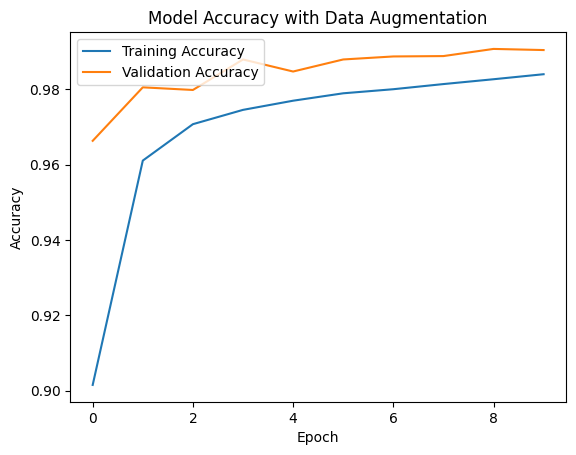

In [44]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to include a channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to include a channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

data_augmentation = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.1,  # shear angle in counter-clockwise direction in degrees
    zoom_range=0.1,  # randomly zoom image 
    horizontal_flip=False,  # randomly flip images
    fill_mode='nearest'  # set mode for filling points outside the input boundaries
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) / 32,  # Number of batch iterations per epoch
    epochs=10,
    validation_data=(x_test, y_test)
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## k) write colabs for data augmentation and classification for image

In [57]:
# Data loading and preprocessing (example with MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Model definition
image_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

image_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
image_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1201 - accuracy: 0.6233 - val_loss: 0.4137 - val_accuracy: 0.8691
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6686 - accuracy: 0.7830 - val_loss: 0.3922 - val_accuracy: 0.8725
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5489 - accuracy: 0.8195 - val_loss: 0.4477 - val_accuracy: 0.8551
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4747 - accuracy: 0.8448 - val_loss: 0.3006 - val_accuracy: 0.9014
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4362 - accuracy: 0.8572 - val_loss: 0.3575 - val_accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4061 - accuracy: 0.8688 - val_loss: 0.3300 - val_accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3797 - accuracy: 0.8782 - val_loss: 0.2890 - val_ac

## l) Demonstrate fastai data augmentation capablities 

epoch,train_loss,valid_loss,error_rate,time
0,0.307267,0.049313,0.017591,02:21


epoch,train_loss,valid_loss,error_rate,time
0,0.179282,0.018040,0.007442,02:49


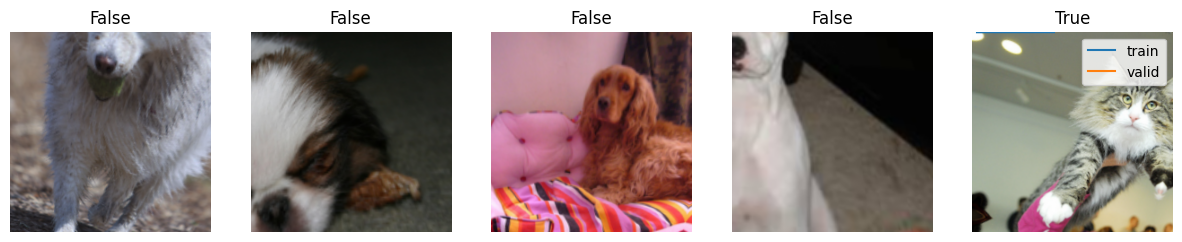

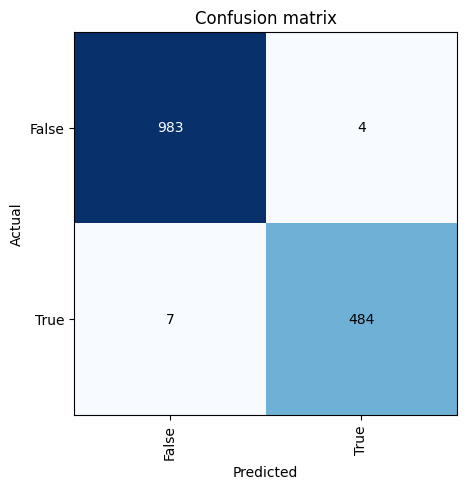

In [15]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2, do_flip=True, flip_vert=False, max_rotate=30.0, min_zoom=1.0, max_zoom=2.0,
                              max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75))

dls.show_batch(nrows=1, ncols=5)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

learn.recorder.plot_loss()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()